In [1]:
from signals import *
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp
from indicators import CCI, SuperTrend
from matplotlib import pyplot as plt
from math import exp, log

%matplotlib inline

df = load_ticker("EURUSD", 60)
begin = df.index[0]
end = df.index[-1]
days = (end-begin).days
all_months = days * 12 / 365
CCI(df, 10)

,Open,High,Low,Close,CCI
2019-01-21 23:00:00,1.1369,1.1370,1.1367,1.1368,0.000000
2019-01-22 00:00:00,1.1367,1.1370,1.1367,1.1367,0.000000
2019-01-22 01:00:00,1.1367,1.1371,1.1365,1.1368,0.000000
2019-01-22 02:00:00,1.1368,1.1369,1.1365,1.1366,0.000000
2019-01-22 03:00:00,1.1367,1.1369,1.1361,1.1361,0.000000
...,...,...,...,...,...
2020-03-20 17:00:00,1.0661,1.0693,1.0652,1.0666,-86.886333
2020-03-20 18:00:00,1.0667,1.0667,1.0637,1.0656,-112.532650
2020-03-20 19:00:00,1.0655,1.0670,1.0636,1.0667,-84.461942
2020-03-20 20:00:00,1.0668,1.0701,1.0662,1.0699,-4.906682


### Single Supertrend Signal

2019-01-22 -> 2019-01-22: Sell: balance = £1,053 11 pips, Lots = 0.50
2019-01-23 -> 2019-01-24: Sell: balance = £998 -10 pips, Lots = 0.53
2019-01-24 -> 2019-01-24: Sell: balance = £1,051 11 pips, Lots = 0.50
2019-01-25 -> 2019-01-25: Sell: balance = £996 -10 pips, Lots = 0.53
2019-01-25 -> 2019-01-25: Sell: balance = £1,049 11 pips, Lots = 0.50
2019-01-28 -> 2019-01-29: Sell: balance = £1,105 11 pips, Lots = 0.52
2019-01-29 -> 2019-01-29: Sell: balance = £1,163 11 pips, Lots = 0.55
2019-01-30 -> 2019-01-30: Sell: balance = £1,225 11 pips, Lots = 0.58
2019-01-30 -> 2019-01-30: Sell: balance = £1,290 11 pips, Lots = 0.61
2019-01-31 -> 2019-01-31: Sell: balance = £1,223 -10 pips, Lots = 0.65
2019-01-31 -> 2019-01-31: Sell: balance = £1,159 -10 pips, Lots = 0.61
2019-01-31 -> 2019-01-31: Sell: balance = £1,221 11 pips, Lots = 0.58
2019-02-01 -> 2019-02-01: Sell: balance = £1,286 11 pips, Lots = 0.61
2019-02-04 -> 2019-02-04: Sell: balance = £1,354 11 pips, Lots = 0.64
2019-02-05 -> 2019-0

2019-05-24 -> 2019-05-24: Sell: balance = £5,329 -10 pips, Lots = 2.81
2019-05-24 -> 2019-05-24: Sell: balance = £5,052 -10 pips, Lots = 2.66
2019-05-24 -> 2019-05-27: Sell: balance = £4,790 -10 pips, Lots = 2.53
2019-05-28 -> 2019-05-28: Sell: balance = £4,540 -10 pips, Lots = 2.39
2019-05-28 -> 2019-05-28: Sell: balance = £4,304 -10 pips, Lots = 2.27
2019-05-28 -> 2019-05-29: Sell: balance = £4,081 -10 pips, Lots = 2.15
2019-05-29 -> 2019-05-29: Sell: balance = £4,297 11 pips, Lots = 2.04
2019-05-30 -> 2019-05-30: Sell: balance = £4,525 11 pips, Lots = 2.15
2019-05-31 -> 2019-05-31: Sell: balance = £4,289 -10 pips, Lots = 2.26
2019-05-31 -> 2019-05-31: Sell: balance = £4,066 -10 pips, Lots = 2.14
2019-05-31 -> 2019-06-03: Sell: balance = £3,855 -10 pips, Lots = 2.03
2019-06-03 -> 2019-06-03: Sell: balance = £4,059 11 pips, Lots = 1.93
2019-06-03 -> 2019-06-03: Sell: balance = £4,274 11 pips, Lots = 2.03
2019-06-06 -> 2019-06-06: Sell: balance = £4,501 11 pips, Lots = 2.14
2019-06-06 

2019-09-18 -> 2019-09-19: Sell: balance = £28,653 11 pips, Lots = 13.61
2019-09-20 -> 2019-09-20: Sell: balance = £30,172 11 pips, Lots = 14.33
2019-09-23 -> 2019-09-23: Sell: balance = £31,771 11 pips, Lots = 15.09
2019-09-24 -> 2019-09-24: Sell: balance = £30,119 -10 pips, Lots = 15.89
2019-09-24 -> 2019-09-24: Sell: balance = £28,552 -10 pips, Lots = 15.06
2019-09-26 -> 2019-09-26: Sell: balance = £27,068 -10 pips, Lots = 14.28
2019-09-26 -> 2019-09-26: Sell: balance = £28,502 11 pips, Lots = 13.53
2019-09-27 -> 2019-09-27: Sell: balance = £30,013 11 pips, Lots = 14.25
2019-09-30 -> 2019-09-30: Sell: balance = £31,604 11 pips, Lots = 15.01
2019-09-30 -> 2019-09-30: Sell: balance = £29,960 -10 pips, Lots = 15.80
2019-10-01 -> 2019-10-01: Sell: balance = £31,548 11 pips, Lots = 14.98
2019-10-02 -> 2019-10-02: Sell: balance = £33,220 11 pips, Lots = 15.77
2019-10-02 -> 2019-10-02: Sell: balance = £31,493 -10 pips, Lots = 16.61
2019-10-03 -> 2019-10-03: Sell: balance = £33,162 11 pips, 

2020-01-29 -> 2020-01-29: Sell: balance = £90,631 -10 pips, Lots = 47.80
2020-01-29 -> 2020-01-29: Sell: balance = £95,435 11 pips, Lots = 45.31
2020-01-29 -> 2020-01-29: Sell: balance = £90,472 -10 pips, Lots = 47.72
2020-01-29 -> 2020-02-23: Sell: balance = £95,267 11 pips, Lots = 45.24
2020-02-24 -> 2020-02-24: Sell: balance = £100,316 11 pips, Lots = 47.63
2020-02-25 -> 2020-02-25: Sell: balance = £105,633 11 pips, Lots = 50.16
2020-02-27 -> 2020-02-27: Sell: balance = £100,140 -10 pips, Lots = 52.82
2020-02-27 -> 2020-02-27: Sell: balance = £105,447 11 pips, Lots = 50.07
2020-02-27 -> 2020-02-27: Sell: balance = £99,964 -10 pips, Lots = 52.72
2020-02-27 -> 2020-02-27: Sell: balance = £94,766 -10 pips, Lots = 49.98
2020-02-27 -> 2020-02-27: Sell: balance = £89,838 -10 pips, Lots = 47.38
2020-02-27 -> 2020-02-27: Sell: balance = £94,600 11 pips, Lots = 44.92
2020-02-28 -> 2020-02-28: Sell: balance = £99,613 11 pips, Lots = 47.30
2020-03-02 -> 2020-03-02: Sell: balance = £94,434 -10 

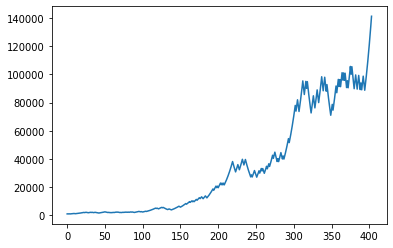

In [43]:
def supertrend_signals(ticker, frequency, multiplier, period, cci_period,
                       take_profit, stop_loss, verbose=False, 
                       risk=0.05, date=None, 
                       tp_follow=False, sl_follow=False):

    period = int(period)
    cci_period = int(period)
    balance = 1000
    ST = 0
    last_ST = 0
    last_CCI = 0
    signal = 0
    stance = 0
    take_profit_price = None
    stop_loss_price = None
    entry = None
    entry_date = None
    profit_pips = 0.0
    win = 0
    loss = 0
    profits = []
    balances = [balance]
    risk_stop_loss = stop_loss
        
    # TODO: average spread per ticker
    spread = 2.0 / pip_factor(ticker)
    fee_pounds_per_lot = 4

    df = load_ticker(ticker, frequency)
    if date:
        df = df.loc[date]
    
    trend_col_name = 'STX'
    SuperTrend(df, period, multiplier)
    cci_col_name = 'CCI'
    CCI(df, cci_period)

    for dt, row in df.iterrows():
        signal = 0
        
        ST_val = row[trend_col_name]            
        CCI_val = row[cci_col_name]
            
        if CCI_val > -100 and last_CCI < -100 and ST_val > 0:
            signal = 1
        elif CCI_val < 100 and last_CCI > 100 and ST_val < 0:
            signal = -1
            
        last_ST = ST_val
        last_CCI = CCI_val
        
        def close_buy(exit_price):
            nonlocal profit_pips, profits, entry, win, loss, balance
            if entry is None:
                return
            trade_profit = (exit_price - entry) * pip_factor(ticker)
            profit_pips += trade_profit
            profits.append(trade_profit)
            
            pounds_per_pip = (risk * balance) / (risk_stop_loss + spread)
            lots = pounds_per_pip/10.
            fees = lots * fee_pounds_per_lot
            balance += (pounds_per_pip * trade_profit) - fees
            balances.append(balance)
            
            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                
            if verbose:
                print(f"{entry_date.date()} -> {dt.date()}: Buy : balance = £{balance:,.0f}, {trade_profit:.0f} pips, Lots = {pounds_per_pip/10:.2f}")
            
        def close_sell(exit_price):
            nonlocal profit_pips, profits, entry, win, loss, balance
            if entry is None:
                return
            trade_profit = (entry - exit_price) * pip_factor(ticker)
            profit_pips += trade_profit
            profits.append(trade_profit)
            
            pounds_per_pip = (risk * balance) / (risk_stop_loss + spread)
            lots = pounds_per_pip/10.
            fees = lots * fee_pounds_per_lot
            balance += (pounds_per_pip * trade_profit) - fees    
            balances.append(balance)

            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                        
            if verbose:
                print(f"{entry_date.date()} -> {dt.date()}: Sell: balance = £{balance:,.0f} {trade_profit:.0f} pips, Lots = {pounds_per_pip/10:.2f}")
                                
                                    
        def open_buy(price, dt):
            nonlocal entry, take_profit_price, stop_loss_price, stance, entry_date
            entry = price
            take_profit_price = entry + (take_profit/pip_factor(ticker))
            stop_loss_price = entry - (stop_loss/pip_factor(ticker))
            stance = 1
            entry_date = dt
            
        def open_sell(price, dt):
            nonlocal entry, take_profit_price, stop_loss_price, stance, entry_date
            entry = price
            take_profit_price = entry - (take_profit/pip_factor(ticker))
            stop_loss_price = entry + (stop_loss/pip_factor(ticker))
            stance = -1
            entry_date = dt
            
        if stance > 0:
            if row.High > take_profit_price:
                stance = 0
                close_buy(take_profit_price)
                if tp_follow:
                    open_buy(take_profit_price + spread, dt)
                    
            if row.Low < stop_loss_price:
                stance = 0
                close_buy(stop_loss_price)
                if sl_follow:
                    open_buy(stop_loss_price + spread, dt)

        elif stance < 0:
            if row.Low < take_profit_price:
                stance = 0
                close_sell(take_profit_price)
                if tp_follow:
                    open_sell(take_profit_price + spread, dt)

            if row.High > stop_loss_price:
                stance = 0
                close_sell(stop_loss_price)
                if sl_follow:
                    open_sell(stop_loss_price + spread, dt)
        
        if stance != ST_val:
            stance = 0
            close_sell(row.Close)

            
        if signal != 0 and stance != signal:
            if signal == 1:
                if stance == -1:
                    close_sell(row.Close)
                open_buy(row.Close + spread, dt)

            if signal == -1:
                if stance == 1:
                    close_buy(row.Close)
                open_sell(row.Close + spread, dt)
                
    win_ratio = 1.*win/(win+loss)

    if verbose:
        print(f"{win + loss} Trades, Win Ratio = {win_ratio:.2}")
        #plt.hist(profits, bins=20)
        plt.plot(balances)
        
    if verbose is True:
        return -balance
    else:
        return -((balance-1000) * win_ratio) / all_months
        #return win-loss
        #return -balance

eurusd = {'ticker': "EURUSD", "frequency": 60, # 75% £39,190.47
          'cci_period': 147.0, 'multiplier': 3.5, 'period': 8.0, 'stop_loss': 34.0, 'take_profit': 29.0}
eurjpy = {'ticker': 'EURJPY','frequency': 60,  # 21% £83,324.75
          'cci_period': 91.0, 'multiplier': 28.0, 'period': 199.0, 'stop_loss': 12.0, 'take_profit': 240.0}
audusd = {'ticker': 'AUDUSD','frequency': 60, # 65% £16,120
          'cci_period': 23.0, 'multiplier': 2.1, 'period': 5.0, 'stop_loss': 18.0, 'take_profit': 18.0} # 8315
audcad = {'ticker': 'AUDCAD','frequency': 60, # 63% £141,244.08
          'cci_period': 104.0, 'multiplier': 40, 'period': 8.0, 'stop_loss': 10.0, 'take_profit': 11.0}

final_balance = -supertrend_signals(**audcad, verbose=True)
monthly_percent_return = (exp(log(final_balance/1000)/all_months)-1.0)*100
print(f"£{final_balance:,.2f}, {all_months:.1f} months @ {monthly_percent_return:.1f}%")


In [23]:
def search_for(ticker):

    def objective(params):
        return supertrend_signals(ticker=ticker, frequency=60, **params)
    

    space = {'multiplier': hp.quniform('multiplier', 2, 50, 0.1),
             'period': hp.quniform('period', 2, 200, 1),
             'cci_period': hp.quniform('cci_period', 2, 200, 1),
             'take_profit': hp.quniform('take_profit', 10, 50, 1),
             'stop_loss': hp.quniform('stop_loss', 10, 50, 1)
            }
    print(f"{ticker}:")
    for _ in range(3):
        print(fmin(objective, space, algo=tpe.suggest, max_evals=5120))


In [24]:
search_for("EURUSD")
search_for("AUDCAD")
search_for("EURAUD")
search_for("EURCHF")
search_for("EURGBP")
search_for("GBPJPY")
search_for("GBPUSD")
search_for("USDCAD")
search_for("USDCHF")
search_for("USDJPY")
search_for("AUDUSD")
search_for("EURJPY")

# TODO: Second derivative of result wrt each parameter, want to minimise that to to aviod the 'edges'


AUDUSD:
100%|██████████| 1024/1024 [31:14<00:00,  1.83s/trial, best loss: -502.7802237633935]
{'cci_period': 192.0, 'multiplier': 2.8000000000000003, 'period': 16.0, 'stop_loss': 21.0, 'take_profit': 368.0}
100%|██████████| 1024/1024 [29:35<00:00,  1.73s/trial, best loss: -246.6774177089546]
{'cci_period': 74.0, 'multiplier': 45.1, 'period': 190.0, 'stop_loss': 10.0, 'take_profit': 426.0}
100%|██████████| 1024/1024 [30:07<00:00,  1.77s/trial, best loss: -704.1680617247639]
{'cci_period': 23.0, 'multiplier': 2.1, 'period': 5.0, 'stop_loss': 18.0, 'take_profit': 18.0}
EURUSD:
100%|██████████| 1024/1024 [30:43<00:00,  1.80s/trial, best loss: -2049.167077067042]
{'cci_period': 147.0, 'multiplier': 3.5, 'period': 8.0, 'stop_loss': 34.0, 'take_profit': 29.0}
100%|██████████| 1024/1024 [30:07<00:00,  1.76s/trial, best loss: -1651.9810673810766]
{'cci_period': 147.0, 'multiplier': 3.8000000000000003, 'period': 8.0, 'stop_loss': 33.0, 'take_profit': 37.0}
100%|██████████| 1024/1024 [30:43<00:00

In [12]:
# Search 1


EURAUD:
100%|██████████| 1024/1024 [25:20<00:00,  1.48s/trial, best loss: -2566.488096283579]
{'multiplier': 30.0, 'period': 57.0, 'stop_loss': 21.0, 'take_profit': 112.0}
100%|██████████| 1024/1024 [23:08<00:00,  1.36s/trial, best loss: -2253.6108480311186]
{'multiplier': 30.0, 'period': 55.0, 'stop_loss': 21.0, 'take_profit': 95.0}
100%|██████████| 1024/1024 [20:36<00:00,  1.21s/trial, best loss: -2471.285428235454]
{'multiplier': 30.0, 'period': 55.0, 'stop_loss': 21.0, 'take_profit': 107.0}
EURCHF:
100%|██████████| 1024/1024 [24:31<00:00,  1.44s/trial, best loss: -1384.498672135646]
{'multiplier': 28.0, 'period': 33.0, 'stop_loss': 33.0, 'take_profit': 76.0}
100%|██████████| 1024/1024 [25:51<00:00,  1.52s/trial, best loss: -1180.5907598734477]
{'multiplier': 17.5, 'period': 100.0, 'stop_loss': 45.0, 'take_profit': 22.0}
100%|██████████| 1024/1024 [23:35<00:00,  1.38s/trial, best loss: -1414.9840201858103]
{'multiplier': 30.0, 'period': 15.0, 'stop_loss': 30.0, 'take_profit': 74.0}


### Grid search for SL + TP

In [ ]:
def find_levels(ticker, frequency, multiplier, period, verbose=False):
    tps = list(range(50, 260, 10))
    sls = list(range(10, 60, 10))
    pfs = np.empty((len(sls), len(tps)))

    for t_idx, tp in enumerate(tps):
        for s_idx, sl in enumerate(sls):
            one_hour["take_profit"] = tp
            one_hour["stop_loss"] = sl
            pf = supertrend_signals(**one_hour, tp_follow=True)
            pfs[s_idx][t_idx] = -pf
    return tps, sls, pfs

In [ ]:
tps, sls, pfs = find_levels(ticker="EURUSD", frequency=60, multiplier=4.8, period=63)

In [ ]:
plt.figure(figsize=(100,10))
fig, ax = plt.subplots()
CS = ax.contour(tps, sls, pfs)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=pfs, x=tps, y=sls)])
fig.show()

### Line search for Period

In [ ]:
periods = range(50, 90, 1)
balances = []
for period in periods:
    balances.append(-supertrend_signals("EURUSD", frequency=60, multiplier=4.8, period=period, 
                          take_profit=127, stop_loss=46, verbose=False, risk=0.05))
plt.plot(periods, balances)

### Line search for Multiplier

In [ ]:
multipliers = [x/10. for x in range(40, 61)]
balances = []
for multiplier in multipliers:
    balances.append(-supertrend_signals("EURUSD", frequency=60, multiplier=multiplier, period=63, 
                          take_profit=127, stop_loss=46, verbose=False, risk=0.05))
plt.plot(multipliers, balances)

### Optimal Risk analysis

In [ ]:
risks = [x/100. for x in range(1, 100)]
balances = []
for risk in risks:
    balances.append(-supertrend_signals(**one_sec, risk=risk))
plt.plot(risks, balances)

##     #return -profit_pips
    #return -profit_pips / stop_loss # Minimise stop loss
    #return -np.mean(profits)/np.std(profits) # Sharpe Ratio
    #return -1.*win/(win+loss)   

Balance 5705, 5% risk
print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=63, take_profit=123, stop_loss=21, verbose=False))

#Profit (30 mins) 2019
#print(-supertrend_signals(ticker, frequency=30, multiplier=8, period=110, take_profit=120, stop_loss=70, verbose=True))

Profit (60 mins) 2081
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=123, stop_loss=75, verbose=True))

Sharpe Ratio (0.69) 1416
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=53, take_profit=47, stop_loss=199, verbose=True))

Stop loss reduced profit 849
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=72, stop_loss=28, verbose=True))

### Supertrend SMA

In [ ]:
# Single Supertrend signal
def supertrend_signals_sma(ticker, frequency, multiplier, period, sma_period, take_profit, stop_loss, verbose=False):
    fees = 2.5 # pips
    period = int(period)
    multiplier = int(multiplier)
    sma_period = int(sma_period)
    
    trend_col_name = 'STX_' + str(period) + '_' + str(multiplier)

    ST = 0
    last_ST = 0
    signal = 0
    
    stance = 0
    
    take_profit_price = None
    stop_loss_price = None
    entry = None
    profit_pips = 0.0
    win = 0
    loss = 0
    profits = []

    df = load_ticker(ticker, frequency)
    #df = meta_super_trend(df, signal_frequency, period, multiplier)
    SuperTrend(df, period, multiplier)
    sma_name = f"SMA_{sma_period}"
    SMA(df, "Close", sma_name, sma_period)


    for dt, row in df.iterrows():
        signal = 0
        if row[trend_col_name] > 0 and row[sma_name] > row.Close:
            ST = 1
        elif row[trend_col_name] < 0  and row[sma_name] < row.Close:
            ST = -1
            
        if ST > last_ST:
            signal = 1
        if ST < last_ST:
            signal = -1
            
        last_ST = ST
        
        def close_buy(exit_price):
            nonlocal profit_pips, profits, entry, win, loss
            if entry is None:
                return
            trade_profit = (exit_price - entry) * pip_factor(ticker) - fees
            profit_pips += trade_profit
            profits.append(trade_profit)
            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                
            if verbose:
                print(f"{dt}: Close Buy: profit = {trade_profit}")
            
        def close_sell(exit_price):
            nonlocal profit_pips, profits, entry, win, loss
            if entry is None:
                return
            trade_profit = (entry - exit_price) * pip_factor(ticker) - fees
            profit_pips += trade_profit
            profits.append(trade_profit)
            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                        
            if verbose:
                print(f"{dt}: Close Sell: profit = {trade_profit}")
                        
        #potential_exit = row.Close
        
        #if entry is not None and take_profit_price is not None and stop_loss_price is not None:
        if stance > 0:
            if row.High > take_profit_price:
                stance = 0
                #print("Take Profit hit")
                close_buy(take_profit_price)
                    
            if row.Low < stop_loss_price:
                stance = 0
                #print("Stop Loss hit")
                close_buy(stop_loss_price)

        elif stance < 0:
            if row.Low < take_profit_price:
                stance = 0
                #print(f"Take Profit hit {entry}")
                close_sell(take_profit_price)

            if row.High > stop_loss_price:
                stance = 0
                #print("Stop Loss hit")
                close_sell(stop_loss_price)
            
        if signal != 0 and stance != signal:
            # signal = 1 (Buy)
            # stance = -1, 0
            if signal == 1:
                if stance == -1:
                    close_sell(row.Close)
                entry = row.Close
                take_profit_price = entry + (take_profit/pip_factor(ticker))
                stop_loss_price = entry - (stop_loss/pip_factor(ticker))
                stance = 1
                #print(f"Open Buy: entry = {entry}, tp = {take_profit_price}")

            if signal == -1:
                if stance == 1:
                    close_buy(row.Close)
                entry = row.Close
                take_profit_price = entry - (take_profit/pip_factor(ticker))
                stop_loss_price = entry + (stop_loss/pip_factor(ticker))
                stance = -1
                #print(f"Open Sell: entry = {entry}, tp = {take_profit_price}")

                    
    if verbose:
        print(f"{win + loss} Trades, Win Ratio = {1.*win/(win+loss):.2}")
        plt.hist(profits, bins=20)
    return -profit_pips
    #return -profit_pips / stop_loss # Minimise stop loss
    #return -np.mean(profits)/np.std(profits) # Sharpe Ratio
    #return -1.*win/(win+loss)    

ticker = "EURUSD"
print(-supertrend_signals_sma(ticker, frequency=60, multiplier=5, period=53, sma_period=10,
                          take_profit=123, stop_loss=70, verbose=True))
#Profit (30 mins) 2019
#print(-supertrend_signals(ticker, frequency=30, multiplier=8, period=110, take_profit=120, stop_loss=70, verbose=True))

# Profit (60 mins) 2081
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=123, stop_loss=75, verbose=True))

# Sharpe Ratio (0.69) 1416
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=53, take_profit=47, stop_loss=199, verbose=True))

# Stop loss reduced profit 849
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=72, stop_loss=28, verbose=True))

In [ ]:
def objective(params):
    return supertrend_signals_sma(**params)

space = {'ticker': hp.choice('ticker', ["EURUSD"]),
         'frequency': hp.choice('frequency', [60]),
         'multiplier': hp.quniform('multiplier', 1, 20, 1),
         'period': hp.quniform('period', 10, 200, 1),
         'sma_period': hp.quniform('sma_period', 10, 200, 1),
         'take_profit': hp.quniform('take_profit', 10, 200, 1),
         'stop_loss': hp.quniform('stop_loss', 10, 200, 1),
        }

for _ in range(1):
    print(fmin(objective, space, algo=tpe.suggest, max_evals=100))

    

## Double supertrend 

In [ ]:
def supertrend_signals_open_close(ticker, frequency, open_multiplier, open_period, close_multiplier, close_period, take_profit, stop_loss, verbose=False):
    fees = 2.5 # pips
    open_period = int(open_period)
    open_multiplier = int(open_multiplier)
    close_period = int(close_period)
    close_multiplier = int(close_multiplier)
    
    open_trend_col_name = 'STX_' + str(open_period) + '_' + str(open_multiplier)
    close_trend_col_name = 'STX_' + str(close_period) + '_' + str(close_multiplier)
    close_value_col_name = 'ST_' + str(close_period) + '_' + str(close_multiplier)

    ST = 0
    last_ST = 0
    last_close = None
    last_close_stance = 0
    signal = 0
    
    stance = 0
    
    take_profit_price = None
    stop_loss_price = None
    entry = None
    profit_pips = 0.0
    win = 0
    loss = 0
    profits = []

    df = load_ticker(ticker, frequency)
    
    SuperTrend(df, open_period, open_multiplier)
    SuperTrend(df, close_period, close_multiplier)


    for dt, row in df.iterrows():
        signal = 0
        if row[open_trend_col_name] > 0:
            ST = 1
        elif row[open_trend_col_name] < 0:
            ST = -1
            
        if ST > last_ST:
            signal = 1
        if ST < last_ST:
            signal = -1
            
        last_ST = ST
        
        def close_buy(exit_price):
            nonlocal profit_pips, profits, entry, win, loss
            if entry is None:
                return
            trade_profit = (exit_price - entry) * pip_factor(ticker) - fees
            profit_pips += trade_profit
            profits.append(trade_profit)
            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                
            if verbose:
                print(f"Close Buy: profit = {trade_profit}")
            
        def close_sell(exit_price):
            nonlocal profit_pips, profits, entry, win, loss
            if entry is None:
                return
            trade_profit = (entry - exit_price) * pip_factor(ticker) - fees
            profit_pips += trade_profit
            profits.append(trade_profit)
            entry = None

            if trade_profit > 0:
                win += 1
            else:
                loss += 1
                        
            if verbose:
                print(f"Close Sell: profit = {trade_profit}")
                        
        if stance > 0:
            if last_close_stance != stance:
                close_buy(row.Close)
                    
            if row.High > take_profit_price:
                stance = 0
                #print("Take Profit hit")
                close_buy(take_profit_price)
                    
            if row.Low < stop_loss_price:
                stance = 0
                #print("Stop Loss hit")
                close_buy(stop_loss_price)

        elif stance < 0:
            if last_close_stance != stance:
                close_sell(row.Close)
                    
            elif row.Low < take_profit_price:
                stance = 0
                #print(f"Take Profit hit {entry}")
                close_sell(take_profit_price)

            elif row.High > stop_loss_price:
                stance = 0
                #print("Stop Loss hit")
                close_sell(stop_loss_price)
            
        if signal != 0 and stance != signal:
            # signal = 1 (Buy)
            # stance = -1, 0
            if signal == 1:
                if stance == -1:
                    close_sell(row.Close)
                entry = row.Close
                take_profit_price = entry + (take_profit/pip_factor(ticker))
                stop_loss_price = entry - (stop_loss/pip_factor(ticker))
                stance = 1
                #print(f"Open Buy: entry = {entry}, tp = {take_profit_price}")

            if signal == -1:
                if stance == 1:
                    close_buy(row.Close)
                entry = row.Close
                take_profit_price = entry - (take_profit/pip_factor(ticker))
                stop_loss_price = entry + (stop_loss/pip_factor(ticker))
                stance = -1
                #print(f"Open Sell: entry = {entry}, tp = {take_profit_price}")
                
        last_close = row[close_value_col_name]
        last_close_stance = row[close_trend_col_name]

                    
    if verbose:
        print(f"{win + loss} Trades, Win Ratio = {1.*win/(win+loss):.2}")
        plt.hist(profits, bins=20)
    return -profit_pips
    #return -profit_pips / stop_loss # Minimise stop loss
    #return -np.mean(profits)/np.std(profits) # Sharpe Ratio
    #return -1.*win/(win+loss)    

ticker = "EURUSD"
print(-supertrend_signals_open_close(ticker, frequency=60, open_multiplier=5, open_period=54, 
                          close_multiplier=5, close_period=54,
                          take_profit=123, stop_loss=75, verbose=True))
#Profit (30 mins) 2019
#print(-supertrend_signals(ticker, frequency=30, multiplier=8, period=110, take_profit=120, stop_loss=70, verbose=True))

# Profit (60 mins) 2081
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=123, stop_loss=75, verbose=True))

# Sharpe Ratio (0.69) 1416
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=53, take_profit=47, stop_loss=199, verbose=True))

# Stop loss reduced profit 849
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=72, stop_loss=28, verbose=True))

In [ ]:
def objective(params):
    return supertrend_signals_open_close(**params)

space = {'ticker': hp.choice('ticker', ["EURUSD"]),
         'frequency': hp.choice('frequency', [60*24]),
         'open_multiplier': hp.quniform('open_multiplier', 1, 20, 1),
         'open_period': hp.quniform('open_period', 10, 200, 10),
         'close_multiplier': hp.quniform('close_multiplier', 1, 20, 1),
         'close_period': hp.quniform('close_period', 10, 200, 10),
         'take_profit': hp.quniform('take_profit', 10, 200, 10),
         'stop_loss': hp.quniform('stop_loss', 10, 200, 10),
        }

for _ in range(1):
    print(fmin(objective, space, algo=tpe.suggest, max_evals=1000))

    

### Supertrend and double moving average crossover

In [ ]:

ticker = "EURUSD"

def supertrend_sma_signals(ticker, frequency, multiplier, period, sma_period):
    fees = 2.5 # pips
    period = int(period)
    multiplier = int(multiplier)
    sma_period = int(sma_period)

    

    last_val = 0.0
    entry = None
    profit_pips = 0.0
    
    df = load_ticker(ticker, frequency)
    SuperTrend(df, period, multiplier)
    
    trend_col_name = 'STX_' + str(period) + '_' + str(multiplier)
    sma_name = f"SMA_{sma_period}"
    df = SMA(df, "Close", sma_name, sma_period)


    for dt, row in df.iterrows():
        stance = 0
        if row[trend_col_name] > 0 and row.Close > row[sma_name]:
            stance = 1
        elif row[trend_col_name] < 0 and row.Close < row[sma_name]:
            stance = -1
            
        if stance != last_val:
            # Stance has changed
            if stance > last_val:
                # Sell to neutral
                # Sell to buy
                # Neutral to buy
                if last_val < 0.0 and entry is not None:
                    # Sell to something
                    # Exit the sell
                    profit_pips += (entry - row.Close) * pip_factor(ticker) - fees
                if stance > 0.0:
                    # Something to buy
                    # Take a long position
                    entry = row.Close
                
            if stance < last_val:
                if last_val > 0.0 and entry is not None:
                    profit_pips += (row.Close - entry) * pip_factor(ticker) - fees
                    
                if stance < 0.0:
                    entry = row.Close
        last_val = stance
    return -profit_pips    

print(-supertrend_sma_signals(ticker, 60, 50, 5, 100))

In [ ]:
def objective(params):
    return supertrend_sma_signals(**params)

space = {'ticker': hp.choice('ticker', ["EURUSD"]),
         'frequency': hp.choice('frequency', [60]),
         'multiplier': hp.quniform('multiplier', 1, 20, 1),
         'period': hp.quniform('period', 1, 100, 1),
         'sma_period': hp.quniform('sma_period', 20, 200, 10),
        }

for _ in range(1):
    print(fmin(objective, space, algo=tpe.suggest, max_evals=100))

    

In [ ]:
def meta_super_trend(df, sample_mins, period, multiplier):

    ohlc_dict = {'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last'}
    base_interval = (df.index[1]-df.index[0]).components.minutes
    dfs = []
    for base in range(0, sample_mins, base_interval):
        tmp = df.resample(f"{sample_mins}Min", base=base).apply(ohlc_dict).dropna()
        SuperTrend(tmp, period, multiplier, prefix=sample_mins)
        dfs.append(tmp)

    return pd.concat(dfs).sort_index()